<a href="https://colab.research.google.com/github/Lokuhu/112-2_2LNN/blob/main/%E5%9B%9BD56_HW2_EB_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weight-tuning by Epoch Bound & Learning Goal

● **Identify the application of HW#1: classification**

● **x: real numbers**

● **y: 3 values, real numbers**

In [ ]:
# Identify your best code (of the weight tuning_EB) for HW #1. Best means the best hyperparameter setting in testing performance.
# Rewrite the best weight tuning_EB code for HW #1 into the code of the weight tuning_LG.
# Rewrite the best weight tuning_EB code for HW #1 into the code of the weight tuning_EB_LG.

# Once you have the code, apply the code to learn your dataset for HW #1. The training and test dataset is 80%/20%.
# The performance comparison benchmark is your best weight tuning_EB code.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# 試算表>檔案>共用>發布到網路 即可於colab中讀取
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQhbAejyGUXlZltX2nsbC4sTw890L6081piAP8ZDJVbufqZ9xm-S5P7gIrXnpgszm-U9SmEkBxJc5uF/pub?gid=1265524659&single=true&output=csv'
seed = pd.read_csv(url)

In [ ]:
seed['Type'] = seed['Type'].replace(1, 0.0)
seed['Type'] = seed['Type'].replace(2, 1.0)
seed['Type'] = seed['Type'].replace(3, 2.0)
seed

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
# Split data
X = seed.drop('Type',axis=1).values
y = seed['Type'].values

# # Covert these to numpy arr
# X = X.values
# y = y.values

# 20%test, 80%training
X_train, X_test, y_train, y_test=train_test_split (X, y ,test_size = 0.2, random_state = 30)

# Covert X and y to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Model5 (the best performance on accuracy)

In [ ]:
#hidden nodes = 11, activation function = Tanh, Optimizer = SGD, learning epochs = 300, learning rate = 0.01, momentum = 0.9
class Model5(nn.Module):

    def __init__(self, in_features = 7, h1 = 11, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.out = nn.Linear(h1, out_features)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Use tanh activation
        x = torch.tanh(self.out(x))  # Use tanh activation

        return x

model5 = Model5()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model5.parameters(),lr=0.01)

In [ ]:
model5

Model5(
  (fc1): Linear(in_features=7, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [ ]:
#Train the model5
epochs = 50
error_threshold = 0.01
t_max = 50
losses = []

for t in range(t_max):
    optimizer.zero_grad()
    y_pred = model5(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if loss.item() < error_threshold:
        print(f'Stopping early at epoch {t}, loss: {loss.item()}')
        break
    if t == t_max - 1:
        print(f'Stopping at maximum epochs, loss: {loss.item()}')
        break


# for epoch in range(epochs):
#     optimizer.zero_grad()
#     y_pred = model5(X_train)
#     loss = criterion(y_pred, y_train)
#     loss.backward()
#     optimizer.step()
#     losses.append(loss.item())
#     if loss.item() < error_threshold:
#         print(f'Stopping early at epoch {epoch}, loss: {loss.item()}')
#         break


Stopping at maximum epochs, loss: 0.8156882524490356


Text(0.5, 0, 'Epoch')

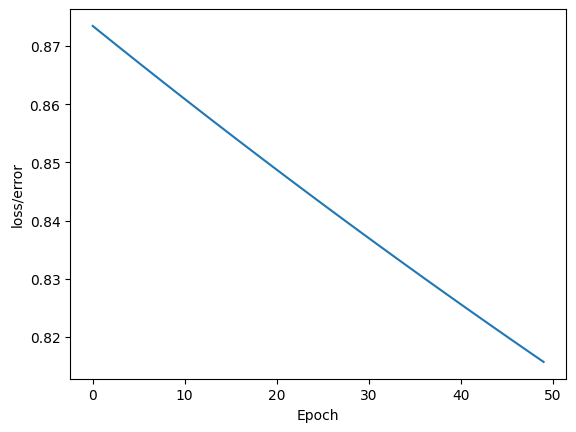

In [ ]:
plt.plot(range(len(losses)), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model1 on test dataset (validation model1 on test set)
with torch.no_grad(): #basically turn off back propogation
    y_eval = model5(X_test) #X_test are features from our test set, y_eval will be predictions
    loss = criterion(y_eval,y_test)# Find the loss or error

In [ ]:
loss

tensor(0.8494)

In [ ]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model5(data)
        print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'we got {correct} correct!')
print(f'the accuracy is {correct/len(y_test)}')

1. tensor([ 0.0769,  0.1262, -0.3059]) 	 1 	 1
2. tensor([ 0.0612, -0.1345,  0.4047]) 	 2 	 2
3. tensor([ 0.0932, -0.2409,  0.5434]) 	 2 	 2
4. tensor([-0.0713,  0.3343, -0.5404]) 	 1 	 1
5. tensor([ 0.2573,  0.0201, -0.5347]) 	 0 	 0
6. tensor([ 0.1035, -0.1703,  0.3820]) 	 2 	 2
7. tensor([ 0.2211, -0.1328, -0.0051]) 	 0 	 0
8. tensor([ 0.2209, -0.0206, -0.3087]) 	 0 	 0
9. tensor([ 0.0702, -0.2302,  0.5684]) 	 2 	 2
10. tensor([-0.1679,  0.3573, -0.2933]) 	 1 	 1
11. tensor([ 0.2622,  0.0053, -0.4797]) 	 0 	 0
12. tensor([-0.2532,  0.4769, -0.4582]) 	 1 	 1
13. tensor([-0.0137,  0.2105, -0.2879]) 	 1 	 1
14. tensor([ 0.1100,  0.1448, -0.4463]) 	 0 	 1
15. tensor([ 0.1282, -0.2671,  0.5215]) 	 2 	 2
16. tensor([ 0.2579, -0.1194, -0.1547]) 	 2 	 0
17. tensor([ 0.1670, -0.1931,  0.2695]) 	 2 	 2
18. tensor([-0.0015, -0.1597,  0.5854]) 	 2 	 2
19. tensor([ 0.2062, -0.0334, -0.2262]) 	 0 	 0
20. tensor([ 0.0601, -0.1879,  0.5094]) 	 2 	 2
21. tensor([ 0.3366, -0.1768, -0.2455]) 	 2 	 0
2